**ESignature**

In a modern setting, an e-Sign refers to a unique, digitised, encrypted personal identifier. The e-Sign is meant to complete transactions, loops, and agreements electronically.



Importing the Library

In [1]:
# Importing Library for reading, writing and perform basic operations
import pandas as pd
import numpy as np
#Importing Library for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Importing the library for evaluating the model
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [2]:
df = pd.read_csv("C:/Users/shorn/Downloads/archive (5)/financial_data.csv")   

In [3]:
df.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


**Exploring the Data**

In [5]:
#Finding the count of each class of dependent variable
print(sum(df["e_signed"]==1))
print(sum(df["e_signed"]==0))

9639
8269


In [7]:
#Checking for percentage of missing data in each column
percent_missing=df.isnull().sum()*100/len(df)
missing_value_df=pd.DataFrame({'percent_missing':percent_missing})
missing_value_df

,percent_missing
entry_id,0.0
age,0.0
pay_schedule,0.0
home_owner,0.0
income,0.0
months_employed,0.0
years_employed,0.0
current_address_year,0.0
personal_account_m,0.0
personal_account_y,0.0


From the above we see that the data is not highly imbalanced since the ratio between the count of two classes of dependent variavles is not so high

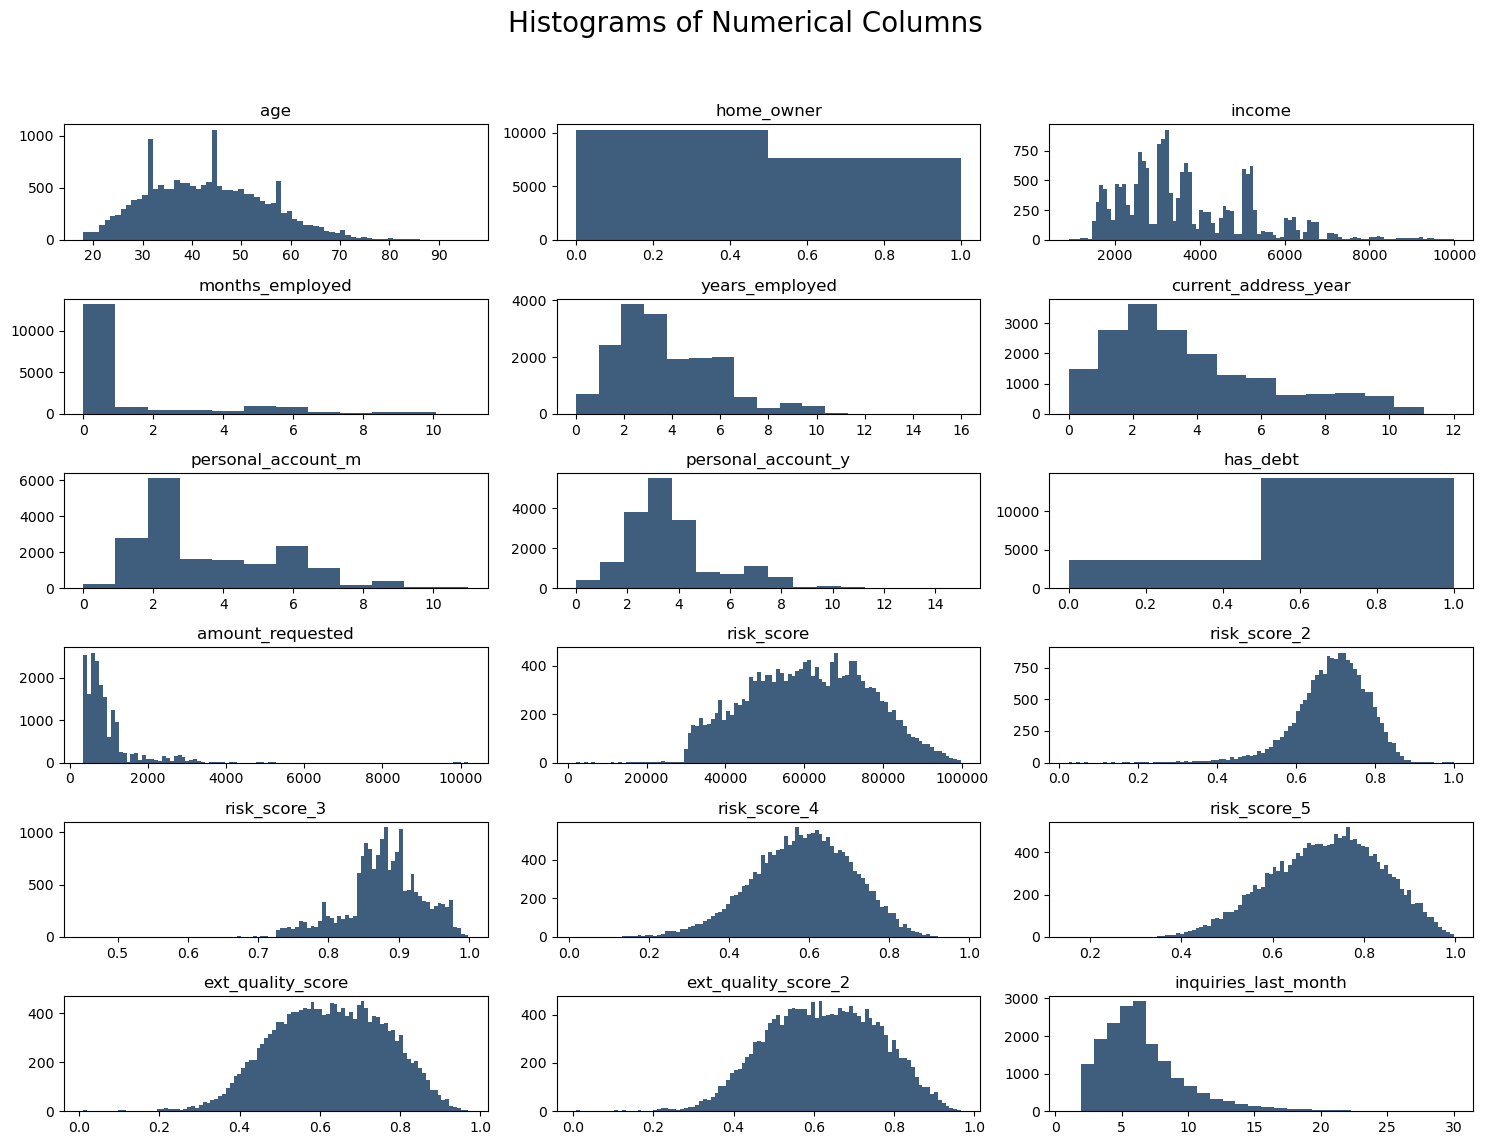

In [8]:
#Dropping the unnecessary columns
dataset2 = df.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

fig = plt.figure(figsize=(15, 12))

plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        

<Axes: title={'center': 'correlation wigh E signed'}>

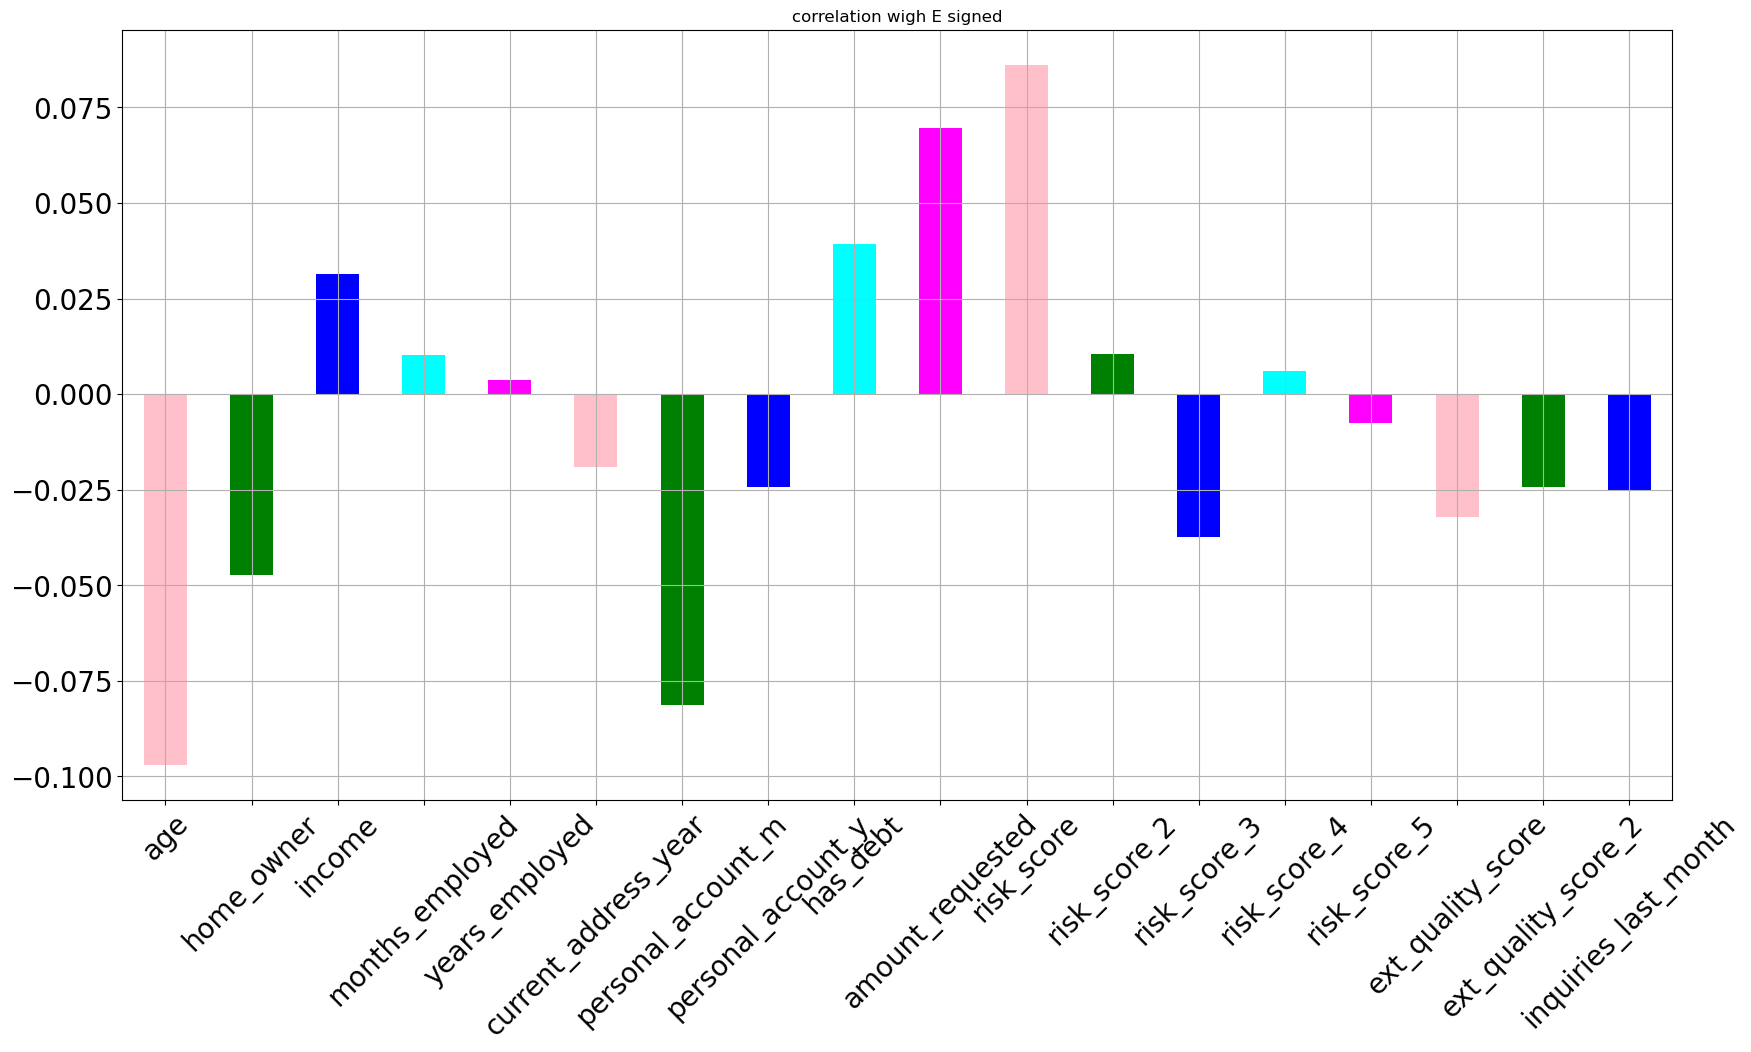

In [9]:
#Correlation of independent variable with dependent variable

dataset2.corrwith(df.e_signed).plot.bar(figsize=(20,10),title="correlation wigh E signed",
                                             fontsize=20,rot=45,grid= True,color=['pink','green',
                                                                                  'blue','cyan','magenta'])

In [10]:
#Initializing into two variable and creating the dummy variable for categorical data
data=df
dummy=pd.get_dummies(data["pay_schedule"])

In [11]:
dummy

,bi-weekly,monthly,semi-monthly,weekly
0,True,False,False,False
1,False,False,False,True
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
17903,False,True,False,False
17904,True,False,False,False
17905,False,False,False,True
17906,True,False,False,False


In [11]:
dummy=dummy.drop(labels=["bi-weekly"],axis=1)

In [12]:
data=data.drop(["pay_schedule"],axis=1)

In [13]:
data=pd.concat([data,dummy],axis=1)

In [14]:
data.shape

(17908, 23)

In [15]:
#Seperating the data into dependent and independent variable. Response contains the esigned column which needs to be computed
#from the dataset
response=data["e_signed"]
dataset=data.drop(columns=["e_signed","entry_id"])

In [17]:
#Transforming the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()


In [18]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [19]:
#Fitting and transforming our data
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [20]:
X_train.shape

(14326, 21)

**Building ANN using Keras**

In [21]:
#Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()

In [22]:
#Adding the Layers in ANN
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))


classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.5527 - loss: 0.6848
Epoch 2/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.5871 - loss: 0.6672
Epoch 3/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.6045 - loss: 0.6584
Epoch 4/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.6126 - loss: 0.6533
Epoch 5/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.6073 - loss: 0.6466
Epoch 6/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.6196 - loss: 0.6456
Epoch 7/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step - accuracy: 0.6265 - loss: 0.6419
Epoch 8/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.6232 - loss: 0.6443
Epoch 9/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.6242 - loss: 0.6425
Epoch 10/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.6270 - loss: 0.6376
Epoch 11/100
1433/1433 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.6264 - loss: 0.63

In [24]:
#predict function the test data using the model
pred=classifier.predict(X_test)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step


In [25]:
y_pred=(pred>0.5)

In [26]:
accuracy_score(y_pred,y_test)

0.6233947515354551

**Other Machine Learning Model**

Feature Engineering

**Age**

Here we will group our age Data as follows

In [60]:
#Initializing the empty list
AGE=[]

for i in range(len(df)):
    if(df["age"][i]<=45):
        AGE.append("ADULT")
        
    else:
        AGE.append("SENIOR")

**Months Employed and Personal Account**

We will calculate months employed as follows:

month employed=month employed+ years employed*12

account_m=account_m+account_y*12

In [61]:
EMPLOYED=[]
for i in range(len(df)):
    x=df["months_employed"][i]+df["years_employed"][i]*12
    EMPLOYED.append(x)

In [62]:
PA=[]
for i in range(len(df)):
    x=df["personal_account_m"][i]+df["personal_account_y"][i]*12
    PA.append(x)

In [63]:
avg_risk=[]
for i in range(len(df)):
    x=(df["risk_score_2"][i]+df["risk_score_3"][i]+df["risk_score_4"][i]+df["risk_score_5"][i])/4
    avg_risk.append(x)

In [64]:
ext_quality=[]
for i in range(len(df)):
    x=(df["ext_quality_score_2"][i]+df["ext_quality_score"][i])/2
    ext_quality.append(x)

**Merging all the features into single DataFrame**

In [65]:
#Converting all lists into DataFrame
AGE=pd.DataFrame(AGE)
EMPLOYED=pd.DataFrame(EMPLOYED)
PA=pd.DataFrame(PA)
avg_risk=pd.DataFrame(avg_risk)
ext_quality=pd.DataFrame(ext_quality)

#Concatng all the features
featured=pd.concat([AGE,EMPLOYED,PA,avg_risk,ext_quality],axis=1)

In [66]:
featured.columns=["AGE","EMPLOYED","PA","RISK","QUALITY"]

In [67]:
featured.head()

,AGE,EMPLOYED,PA,RISK,QUALITY
0,ADULT,36,30,0.661151,0.480918
1,SENIOR,72,86,0.789841,0.680720
2,ADULT,6,19,0.691712,0.531712
3,ADULT,72,86,0.793179,0.692552
4,ADULT,60,98,0.688483,0.744634


In [68]:
#Creating Dummy Variable
dummy1=pd.get_dummies(featured["AGE"])
dummy1.head()

,ADULT,SENIOR
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False


In [69]:
#Dropping the AGE Variable since dummy variable is created
featured=featured.drop(["AGE"],axis=1)

#Concating the data and dummy variable
featured=pd.concat([featured,dummy1],axis=1)
featured.head()

,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,36,30,0.661151,0.480918,True,False
1,72,86,0.789841,0.680720,False,True
2,6,19,0.691712,0.531712,True,False
3,72,86,0.793179,0.692552,True,False
4,60,98,0.688483,0.744634,True,False


**Classifying the Data into dependent and independent Variable**

In [70]:
#Dependent Variable
dep="e_signed"

#Selelcting all the column as independent variable
ind=df.columns.tolist()

In [71]:
ind

['entry_id',
 'age',
 'pay_schedule',
 'home_owner',
 'income',
 'months_employed',
 'years_employed',
 'current_address_year',
 'personal_account_m',
 'personal_account_y',
 'has_debt',
 'amount_requested',
 'risk_score',
 'risk_score_2',
 'risk_score_3',
 'risk_score_4',
 'risk_score_5',
 'ext_quality_score',
 'ext_quality_score_2',
 'inquiries_last_month',
 'e_signed']

In [72]:
#Removing the dependent variable from independent 
ind.remove(dep)
ind.remove("entry_id")

In [73]:
#Selecting the Data
X=df[ind]
Y=df[dep]

In [75]:
#Concating the featured data and unfeatured data
X=pd.concat([X,featured],axis=1)
X.head()

,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,RISK,QUALITY,ADULT,SENIOR,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,40,bi-weekly,1,3135,0,3,3,6,2,1,...,0.661151,0.480918,True,False,36,30,0.661151,0.480918,True,False
1,61,weekly,0,3180,0,6,3,2,7,1,...,0.789841,0.680720,False,True,72,86,0.789841,0.680720,False,True
2,23,weekly,0,1540,6,0,0,7,1,1,...,0.691712,0.531712,True,False,6,19,0.691712,0.531712,True,False
3,40,bi-weekly,0,5230,0,6,1,2,7,1,...,0.793179,0.692552,True,False,72,86,0.793179,0.692552,True,False
4,33,semi-monthly,0,3590,0,5,2,2,8,1,...,0.688483,0.744634,True,False,60,98,0.688483,0.744634,True,False


In [76]:
#Dropping the unnecessay data from our dataset
X=X.drop(labels=["age","months_employed","years_employed","personal_account_m","personal_account_y","risk_score_2","risk_score_3"
                ,"risk_score_4","risk_score_5","ext_quality_score_2","ext_quality_score"],axis=1)

In [77]:
X.head()

,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR
0,bi-weekly,1,3135,3,1,550,36200,10,36,30,0.661151,0.480918,True,False,36,30,0.661151,0.480918,True,False
1,weekly,0,3180,3,1,600,30150,9,72,86,0.789841,0.680720,False,True,72,86,0.789841,0.680720,False,True
2,weekly,0,1540,0,1,450,34550,7,6,19,0.691712,0.531712,True,False,6,19,0.691712,0.531712,True,False
3,bi-weekly,0,5230,1,1,700,42150,8,72,86,0.793179,0.692552,True,False,72,86,0.793179,0.692552,True,False
4,semi-monthly,0,3590,2,1,1100,53850,12,60,98,0.688483,0.744634,True,False,60,98,0.688483,0.744634,True,False


In [78]:
#Creating Dummy Variable
dummy2=pd.get_dummies(X["pay_schedule"])

#Removing the trap
dummy2=dummy2.drop(labels=["bi-weekly"],axis=1)
dummy2.head()

,monthly,semi-monthly,weekly
0,False,False,False
1,False,False,True
2,False,False,True
3,False,False,False
4,False,True,False


In [79]:
#Dropping the pay_schedule since dummy variable is created
X=X.drop(labels=["pay_schedule"],axis=1)

#Concating the data and dummy variable
X=pd.concat([X,dummy2],axis=1)
X.head()

,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,inquiries_last_month,EMPLOYED,PA,RISK,...,SENIOR,EMPLOYED,PA,RISK,QUALITY,ADULT,SENIOR,monthly,semi-monthly,weekly
0,1,3135,3,1,550,36200,10,36,30,0.661151,...,False,36,30,0.661151,0.480918,True,False,False,False,False
1,0,3180,3,1,600,30150,9,72,86,0.789841,...,True,72,86,0.789841,0.680720,False,True,False,False,True
2,0,1540,0,1,450,34550,7,6,19,0.691712,...,False,6,19,0.691712,0.531712,True,False,False,False,True
3,0,5230,1,1,700,42150,8,72,86,0.793179,...,False,72,86,0.793179,0.692552,True,False,False,False,False
4,0,3590,2,1,1100,53850,12,60,98,0.688483,...,False,60,98,0.688483,0.744634,True,False,False,True,False


**Data Transformation and Model Building**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
scale=StandardScaler()
#Transforming the data
X=scale.fit_transform(X)

**Splitting the Data**

In [83]:
#from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

**Random Forest**

In [84]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [85]:
#Initializing the object
model=RandomForestClassifier()

In [86]:
#Fitting the model
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [87]:
#Predictions on test data
pred=model.predict(xtest)

In [88]:
accuracy_score(ytest,pred)

0.6129104310922493

**Gradient Boosting**

In [93]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(xtrain, ytrain)

In [94]:
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(xtrain, ytrain)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(xtest, ytest)))

Learning rate:  1
Accuracy score (training): 0.605
Accuracy score (validation): 0.565


**XgBoost**

In [98]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 1.4 MB/s eta 0:01:32
   ---------------------------------------- 0.1/124.9 MB 825.8 kB/s eta 0:02:32
   ---------------------------------------- 0.2/124.9 MB 1.5 MB/s eta 0:01:25
   ---------------------------------------- 0.5/124.9 MB 3.0 MB/s eta 0:00:42
   ---------------------------------------- 1.0/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 1.7/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 2.5/124.9 MB 8.3 MB/s eta 0:00:15
   - -------------------------------------- 3.3/124.9 MB 9.0 MB/s eta 0:00:14
   - -------------------------------------- 4.1/124.9 MB 10.4 MB/s eta 0:00:12
   - -------------------------------------- 4.8/124.9 MB 10.7 MB/s eta 0:00:12
   - -------------------------------------- 5.4/124.9 MB 10.8 MB/s eta 0:00:12
   - -------------------------------------- 6.2/124.9 MB 11.3 MB/s

In [99]:
#Implementing xgboost
from xgboost import XGBClassifier

In [100]:
#Initializing the model
xgb_clf = XGBClassifier()
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
score = xgb_clf.score(xtest, ytest)
print(score)

0.6341299977663614


**Support Vector Machine**

In [102]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(xtrain, ytrain)

SVC(random_state=0)

In [103]:
# Predicting Test Set
y_pred = classifier.predict(xtest)

In [104]:
#Finding the Accuracy Score
acc = accuracy_score(ytest, y_pred)
acc

0.5874469510833147

**Models Implemnted**

Artificial Neural netwrok

Random Forest Classifier

Gradient Boosting

Support Vector Machine

XgBoost

**Conclusion**

XgBoost Algorithm performs the best and give the accuracy of 62 %

We see that the ANN with no feature engineering performs far better than SVM, Random Forest with feature engineering

Though we did not get very high accuracy but this can help the banks knows whether the customer is risky. 